In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

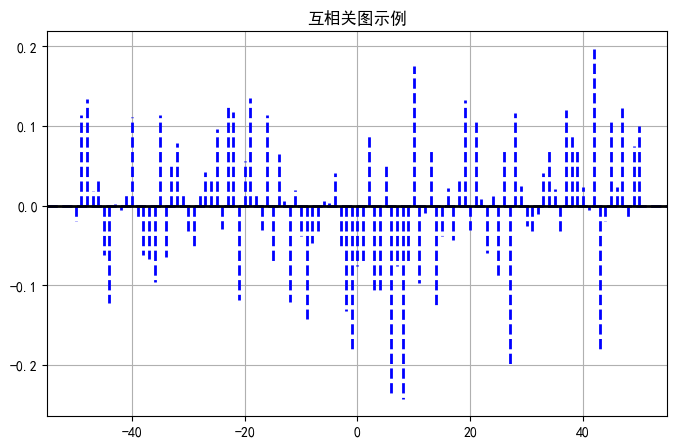

In [3]:
# 生成两个随机信号
x, y = np.random.randn(2, 100)

plt.figure(figsize=(8, 5))

# 绘制互相关图
plt.xcorr(
    x, y,                 # 输入两个待分析的随机信号
    maxlags=50,           # 设置最大延迟步数为50，即分析范围为[-50, 50]步
    usevlines=True,       # 绘制垂直参考线
    normed=True,          # 对互相关结果进行归一化，使系数范围在[-1, 1]之间
    color='b',            # 设置曲线和参考线的颜色为蓝色
    linestyle='--',       # 设置互相关曲线的样式为虚线
    linewidth=2           # 设置曲线和参考线的线宽为2
)

# 添加网格
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.title('互相关图示例')
plt.show()

# 2、使用示例：

### 示例 1：不同类型数据的互相关特性分析

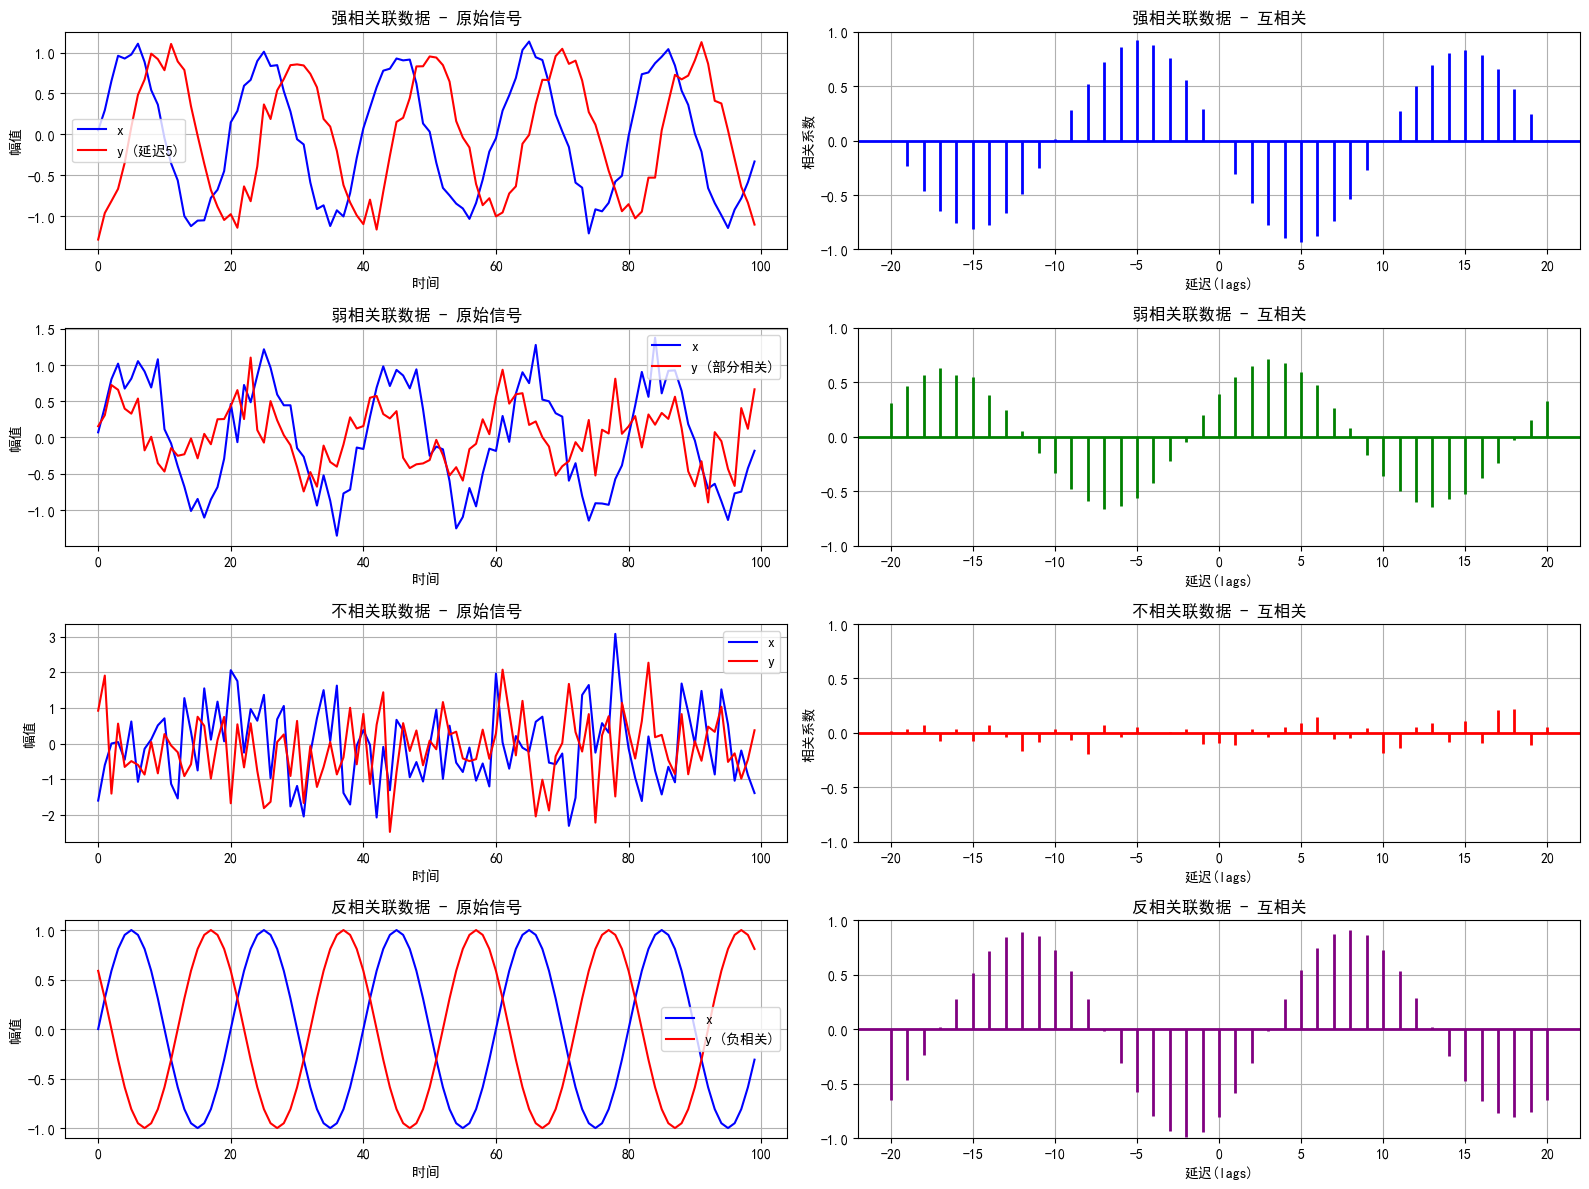

In [4]:
from matplotlib.mlab import detrend_mean

# 创建测试数据
np.random.seed(42)
n_samples = 100
time = np.arange(n_samples)

# 1. 强相关联数据 (y是x的延迟版本)
x_strong = np.sin(2 * np.pi * 0.05 * time) + 0.1 * np.random.randn(n_samples)
y_strong = np.roll(x_strong, 5) + 0.1 * np.random.randn(n_samples)

# 2. 弱相关联数据 (y与x有部分相似特征)
x_weak = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.randn(n_samples)
y_weak = 0.5 * np.sin(2 * np.pi * 0.05 * (time + 3)) + 0.3 * np.random.randn(n_samples)

# 3. 不相关联数据 (完全随机)
x_random = np.random.randn(n_samples)
y_random = np.random.randn(n_samples)

# 4. 反相关联数据 (负相关)
x_negative = np.sin(2 * np.pi * 0.05 * time)
y_negative = -np.roll(x_negative, 2)

# 创建图形
plt.figure(figsize=(16, 12))

# 1. 强相关联数据
# 原始数据图
plt.subplot(4, 2, 1)
plt.plot(time, x_strong, 'b-', label='x')
plt.plot(time, y_strong, 'r-', label='y (延迟5)')
plt.title('强相关联数据 - 原始信号')
plt.xlabel('时间')
plt.ylabel('幅值')
plt.legend()
plt.grid(True)

# 互相关图
plt.subplot(4, 2, 2)
plt.xcorr(x_strong, y_strong, usevlines=True, maxlags=20, normed=True, 
          lw=2, color='blue', detrend=detrend_mean)
plt.title('强相关联数据 - 互相关')
plt.xlabel('延迟(lags)')
plt.ylabel('相关系数')
plt.ylim(-1, 1)
plt.grid(True)

# 2. 弱相关联数据
# 原始数据图
plt.subplot(4, 2, 3)
plt.plot(time, x_weak, 'b-', label='x')
plt.plot(time, y_weak, 'r-', label='y (部分相关)')
plt.title('弱相关联数据 - 原始信号')
plt.xlabel('时间')
plt.ylabel('幅值')
plt.legend()
plt.grid(True)

# 互相关图
plt.subplot(4, 2, 4)
plt.xcorr(x_weak, y_weak, usevlines=True, maxlags=20, normed=True, 
          lw=2, color='green', detrend=detrend_mean)
plt.title('弱相关联数据 - 互相关')
plt.xlabel('延迟(lags)')
plt.ylim(-1, 1)
plt.grid(True)

# 3. 不相关联数据
# 原始数据图
plt.subplot(4, 2, 5)
plt.plot(time, x_random, 'b-', label='x')
plt.plot(time, y_random, 'r-', label='y')
plt.title('不相关联数据 - 原始信号')
plt.xlabel('时间')
plt.ylabel('幅值')
plt.legend()
plt.grid(True)

# 互相关图
plt.subplot(4, 2, 6)
plt.xcorr(x_random, y_random, usevlines=True, maxlags=20, normed=True, 
          lw=2, color='red', detrend=detrend_mean)
plt.title('不相关联数据 - 互相关')
plt.xlabel('延迟(lags)')
plt.ylabel('相关系数')
plt.ylim(-1, 1)
plt.grid(True)

# 4. 反相关联数据
# 原始数据图
plt.subplot(4, 2, 7)
plt.plot(time, x_negative, 'b-', label='x')
plt.plot(time, y_negative, 'r-', label='y (负相关)')
plt.title('反相关联数据 - 原始信号')
plt.xlabel('时间')
plt.ylabel('幅值')
plt.legend()
plt.grid(True)

# 互相关图
plt.subplot(4, 2, 8)
plt.xcorr(x_negative, y_negative, usevlines=True, maxlags=20, normed=True, 
          lw=2, color='purple', detrend=detrend_mean)
plt.title('反相关联数据 - 互相关')
plt.xlabel('延迟(lags)')
plt.ylim(-1, 1)
plt.grid(True)

plt.tight_layout()
plt.show()

### 示例 2：根据返回值标注信息

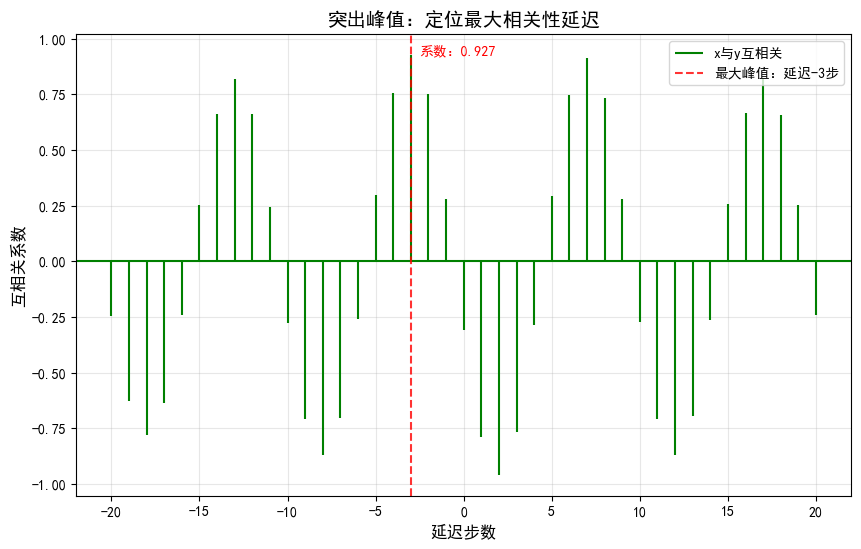

In [5]:
# 生成时间序列数据
np.random.seed(42)
t = np.arange(0, 100, 1)  # 时间步：0~99，共100个数据点
x = np.sin(2 * np.pi * 0.1 * t)  # 信号x：频率0.1Hz的正弦波
noise = 0.2 * np.random.randn(len(t))  # 添加少量高斯噪声
y = np.roll(x, shift=3) + noise  # 信号y：x延迟3步 + 噪声

plt.figure(figsize=(10, 6))

# 计算互相关并获取结果
lags, c, line, b = plt.xcorr(x, y, maxlags=20, color='green', label='x与y互相关')

# 用lags和c定位最大相关延迟
max_corr_idx = np.argmax(c)        # 最大相关系数的索引
max_corr_lag = lags[max_corr_idx]  # 对应延迟步数
max_corr_value = c[max_corr_idx]   # 最大相关系数值

# 添加峰值参考线
plt.axvline(x=max_corr_lag, color='red', linestyle='--', alpha=0.8, label=f'最大峰值：延迟{max_corr_lag}步')

# 标注峰值数值
plt.text(
    max_corr_lag + 0.5,  # 文本x坐标（右移0.5步避免重叠）
    max_corr_value,       # 文本y坐标
    f'系数：{max_corr_value:.3f}',  # 文本内容（保留3位小数）
    fontsize=10,
    color='red'
)

plt.title('突出峰值：定位最大相关性延迟', fontsize=14)
plt.xlabel('延迟步数', fontsize=12)
plt.ylabel('互相关系数', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()